In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Cau 1

In [2]:
leaf = plt.imread("leaf.jpg")

### a)

In [3]:
print("Kich thuoc anh", leaf.shape)

Kich thuoc anh (4984, 3323, 3)


### b)

In [4]:
def Grayscale_Average(img):
    R = np.array(img[:,:,0], dtype=np.float32)
    G = np.array(img[:,:,1], dtype=np.float32)
    B = np.array(img[:,:,2], dtype=np.float32)
    output = (R + G + B) / 3
    return output


def Black_White(img):
    img = Grayscale_Average(img)
    m,n = img.shape
    output = np.zeros([m, n], dtype=np.int64)
    for x in range(m):
        for y in range(n):
            if img[x,y] >= 100:
                output[x, y] = 1
    return output

In [5]:
leaf_bw = Black_White(leaf)

(-0.5, 3322.5, 4983.5, -0.5)

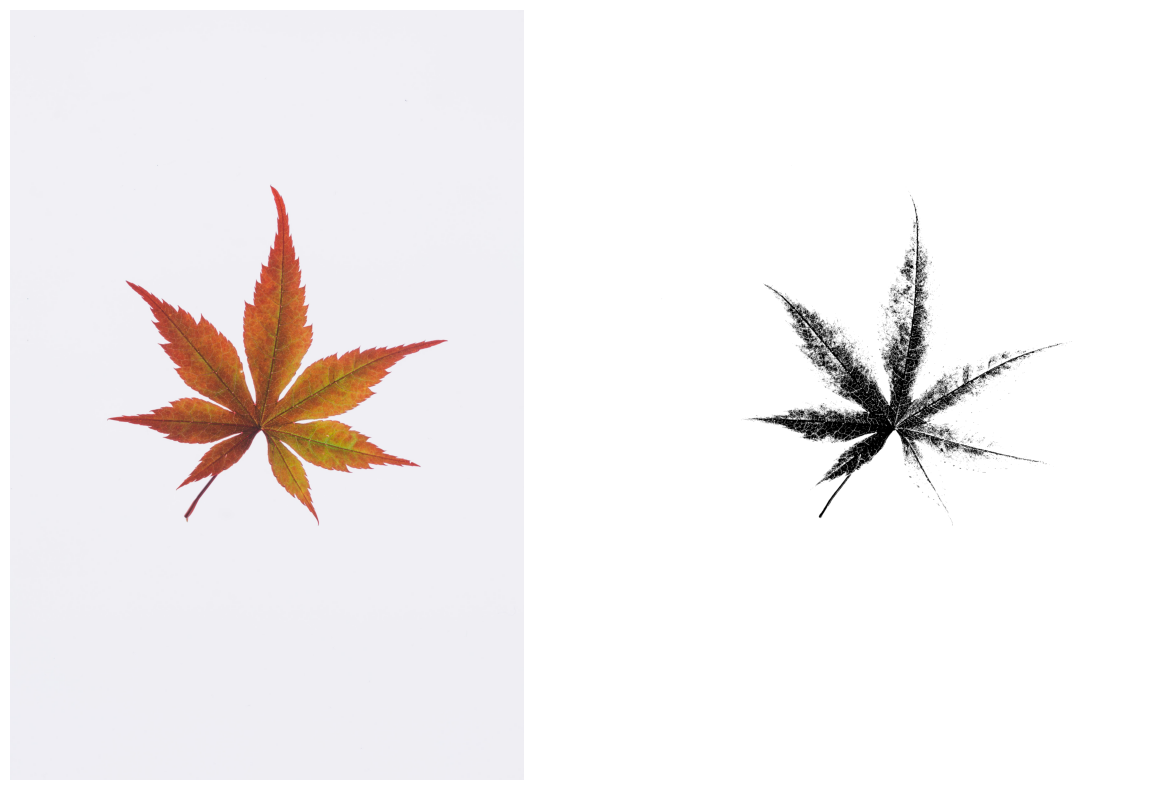

In [6]:

plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.imshow(leaf)
plt.axis('off')

plt.subplot(122)
plt.imshow(leaf_bw, cmap='gray')
plt.axis("off")

### c)

In [7]:
def Hist_image(img):
    h = [(img==v).sum() for v in range(256)]
    hist = np.array(h) # Histogram
    norm = hist/hist.sum() # Normalized histogram
    return hist, norm

def CDF_img(img):
    cdf = np.zeros((256, ))
    _, norm = Hist_image(img)
    for i in range(256):
        cdf[i] = norm[i] + cdf[i-1]
    return cdf

In [8]:
leaf_gray = Grayscale_Average(leaf)

In [9]:
hist_leaf, _ = Hist_image(leaf_gray)
cdf_leaf = CDF_img(leaf_gray)

Text(0.5, 1.0, 'CDF Leaf')

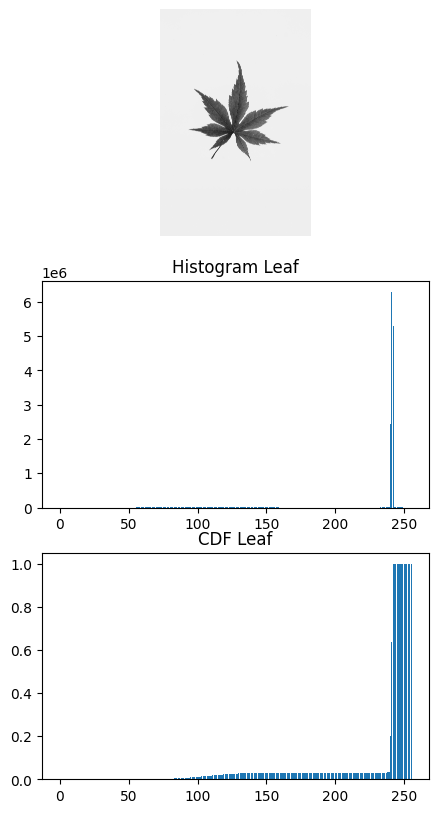

In [10]:

plt.figure(figsize=(5, 10))

plt.subplot(311)
plt.imshow(leaf_gray, cmap='gray')
plt.axis('off')

plt.subplot(312)
plt.bar(np.arange(256), hist_leaf)
plt.title("Histogram Leaf")

plt.subplot(313)
plt.bar(np.arange(256), cdf_leaf)
plt.title("CDF Leaf")

# Cau 2

In [11]:
xray = plt.imread("Xray.tif")

In [12]:
xray.shape

(571, 482)

(-0.5, 481.5, 570.5, -0.5)

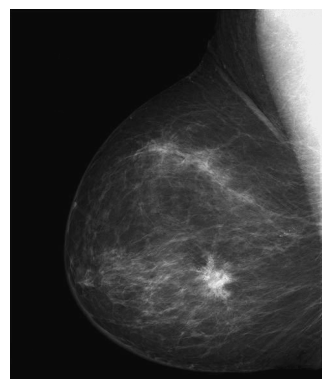

In [13]:
plt.imshow(xray, cmap="gray")
plt.axis('off')

<BarContainer object of 256 artists>

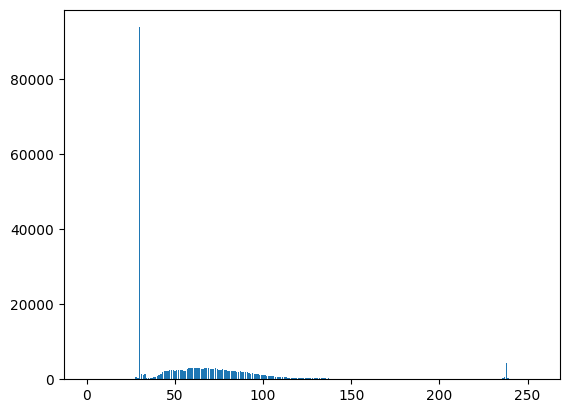

In [14]:
hist_xray, _ = Hist_image(xray)

plt.bar(np.arange(256), hist_xray)

Histogram cho thay phan bo pixel nga ve 0 nen ta ket luan anh nay thieu sang

Ta su dung phuong pham gamma de tang sang hinh anh

In [15]:
def gamma(c, factor, img):
    return c*img**factor

(-0.5, 481.5, 570.5, -0.5)

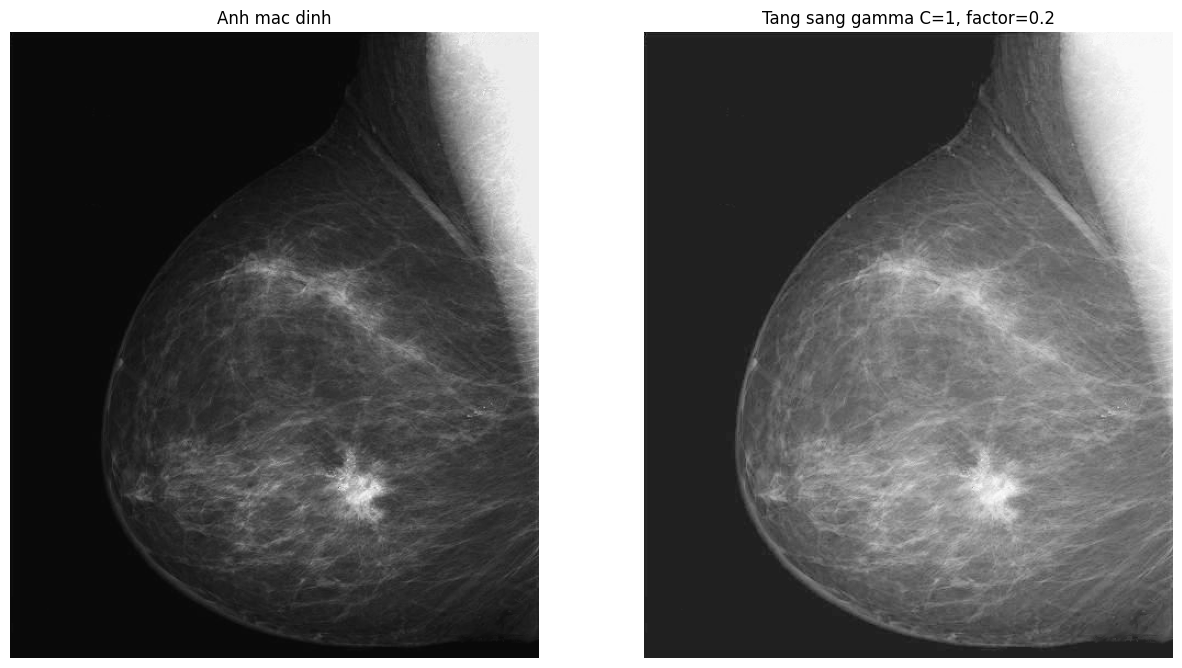

In [16]:
xray_gamma = gamma(c=1, factor=0.1, img=xray)


plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.imshow(xray, cmap='gray')
plt.title("Anh mac dinh")
plt.axis('off')

plt.subplot(122)
plt.imshow(xray_gamma, cmap='gray')
plt.title("Tang sang gamma C=1, factor=0.2")
plt.axis("off")

### b)

In [17]:
import skimage
img_noise = skimage.util.random_noise(xray, mode="gaussian", rng=None)

(-0.5, 481.5, 570.5, -0.5)

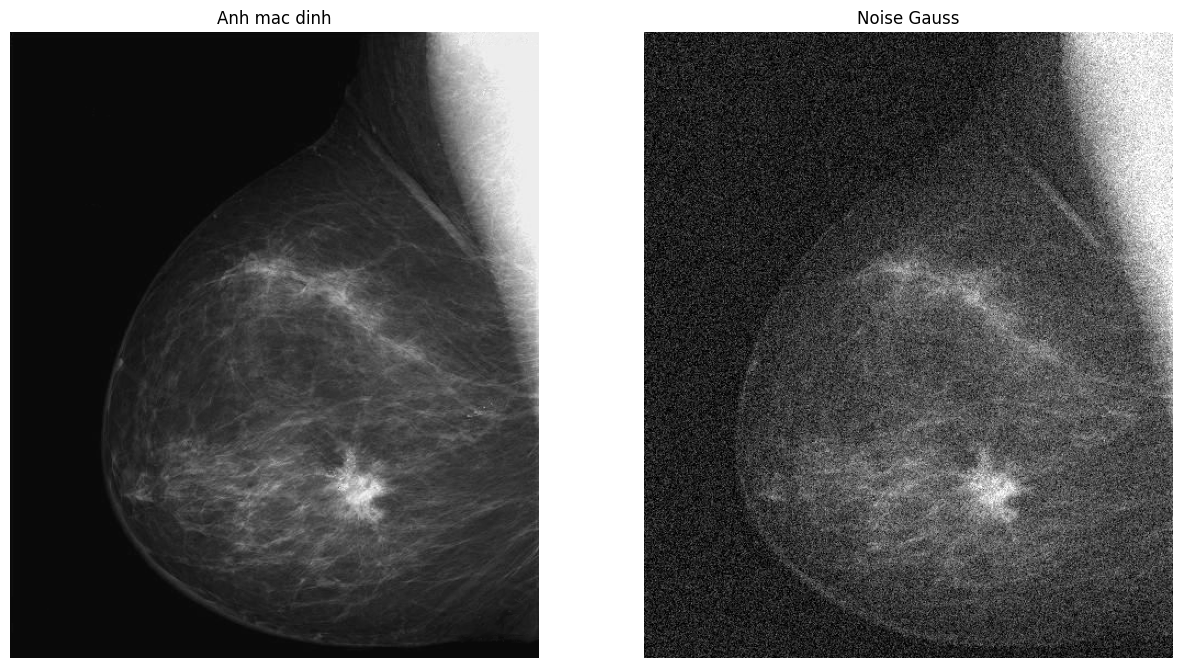

In [18]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.imshow(xray, cmap='gray')
plt.title("Anh mac dinh")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_noise, cmap='gray')
plt.title("Noise Gauss")
plt.axis("off")

### c)

In [19]:
def Mirror_Padding(img, nx, ny):
    height, width = img.shape
    height_new = height + 2*nx
    width_new = width + 2*ny
    output = np.zeros([height_new, width_new])
    # Center
    output[nx:height_new-nx, ny:width_new-ny] = img
    # Top and Bottom
    output[:nx, ny:width_new-ny] = img[nx-1::-1, :] # Top
    output[height+nx:, ny:width_new-ny] = img[height-1:height-nx-1:-1, :] # Bottom
    # Left and Right
    output[:height_new, :ny] = output[:, 2*ny:ny:-1] # Left
    output[:height_new, width_new-ny:width_new] = output[:, width_new-ny-1:width_new-2*ny-1:-1] # Right
    return output

def Box_Filter(img, size):
    img = Mirror_Padding(img, size[0], size[1])
    m, n = img.shape
    output = np.zeros([m, n])
    for x in range(size[0], m-size[0]):
        for y in range(size[1], n-size[1]):
            region = img[x-size[0]//2 : x+size[0]//2+1, y-size[1]//2 : y+size[1]//2+1]
            output[x, y] = np.sum(region)/(size[0]*size[1])
    return output[size[0]:m-size[0], size[1]:n-size[1]]

(-0.5, 481.5, 570.5, -0.5)

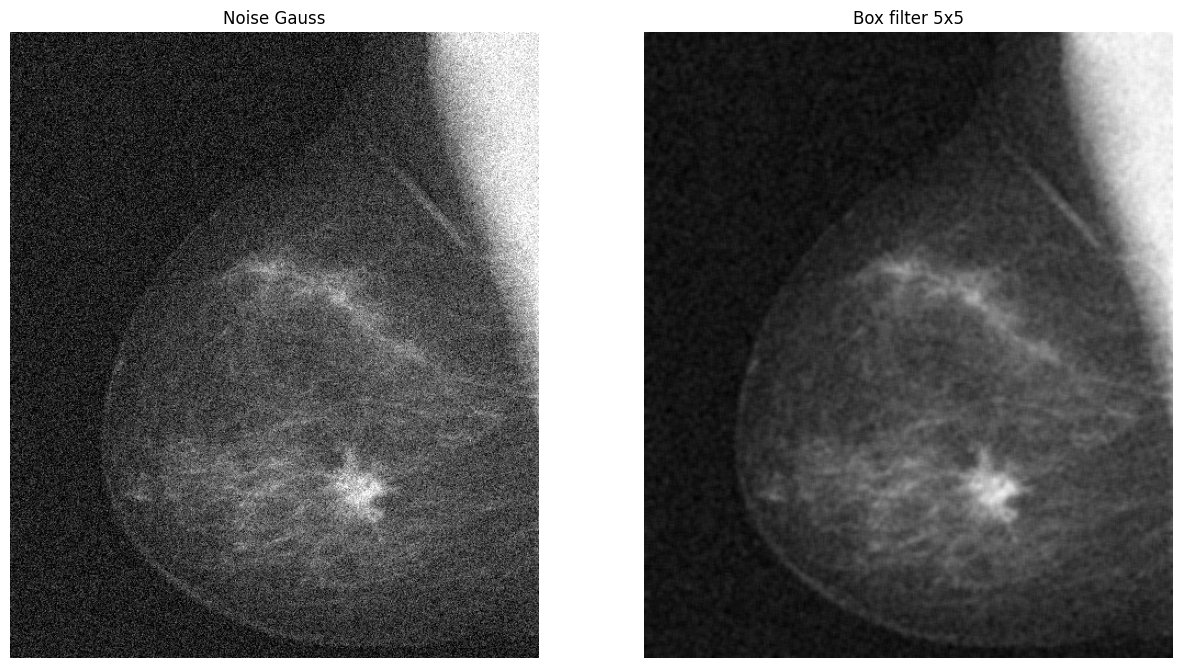

In [20]:
img_box5 = Box_Filter(img_noise, size=(5,5))

plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.imshow(img_noise, cmap='gray')
plt.title("Noise Gauss")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_box5, cmap='gray')
plt.title("Box filter 5x5")
plt.axis("off")

### d)

In [21]:
def GaussFunc(K, sigma, s, t):
    return K*np.exp(-0.5*(np.sqrt(s**2 + t**2))**2 / sigma**2)

def Gauss_Filter(img, size, K, sigma):
    # Create matrix Gauss
    x_axis = np.arange(size[0]//2+1)
    y_axis = np.arange(size[1]//2+1)
    matrix_gauss = np.zeros([size[0], size[1]])
    for y in range(0, size[0]):
        for x in range(0, size[1]):
            value = GaussFunc(K, sigma, x_axis[np.abs(size[0]//2-x)], y_axis[np.abs(size[1]//2-y)])
            matrix_gauss[x, y] = value
    print(matrix_gauss)
    matrix_gauss = 1/np.sum(matrix_gauss) * matrix_gauss
    # Create matrix Gauss
    img = Mirror_Padding(img, size[0], size[1])
    m, n = img.shape
    output = np.zeros([m ,n])
    if size[0] % 2 == 0: c1 = 0
    else: c1 = 1
    if size[1] % 2 == 0: c2 = 0
    else: c2 = 1
    for x in range(size[0], m-size[0]):
        for y in range(size[1], n-size[1]):
            elements = img[x-size[0]//2:x+size[0]//2+c1, y-size[1]//2:y+size[1]//2+c2]
            fxy = elements*matrix_gauss
            output[x,y] = np.sum(fxy)
    return output[size[0]:m-size[0], size[1]:n-size[1]]

[[0.36787944 0.53526143 0.60653066 0.53526143 0.36787944]
 [0.53526143 0.77880078 0.8824969  0.77880078 0.53526143]
 [0.60653066 0.8824969  1.         0.8824969  0.60653066]
 [0.53526143 0.77880078 0.8824969  0.77880078 0.53526143]
 [0.36787944 0.53526143 0.60653066 0.53526143 0.36787944]]


(-0.5, 481.5, 570.5, -0.5)

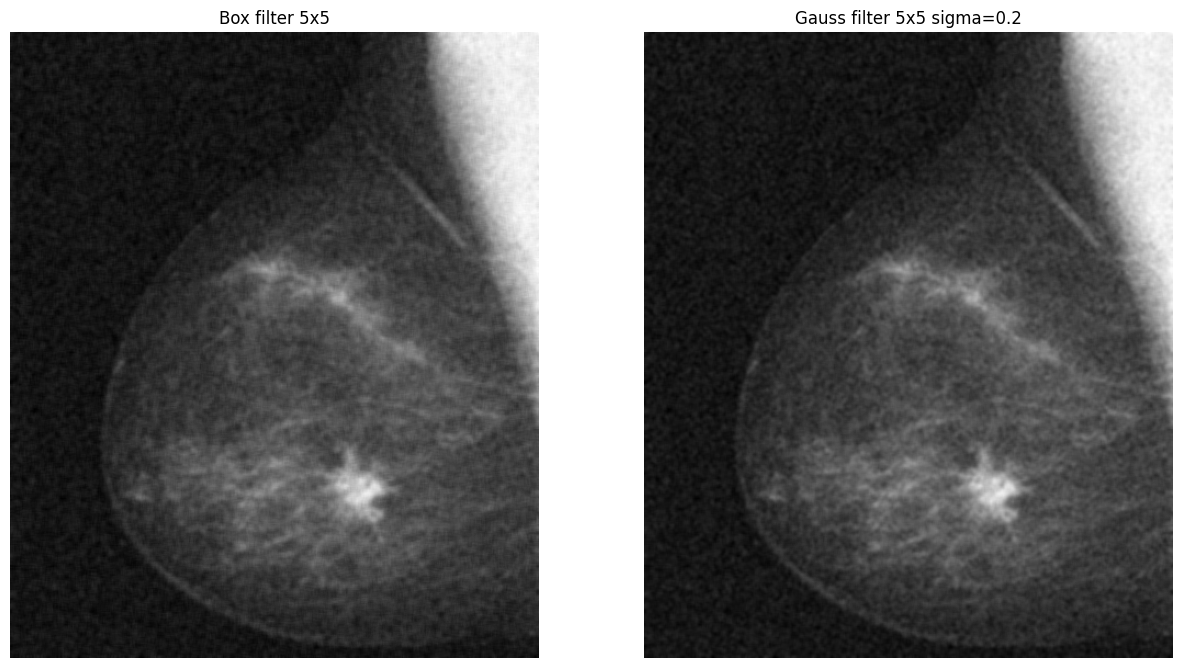

In [24]:
img_gaus5 = Gauss_Filter(img_noise, size=(5,5), sigma=2.0, K=1)

plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.imshow(img_box5, cmap='gray')
plt.title("Box filter 5x5")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_gaus5, cmap='gray')
plt.title("Gauss filter 5x5 sigma=0.2")
plt.axis("off")

### e)

Text(0.5, 1.0, 'Mac dinh')

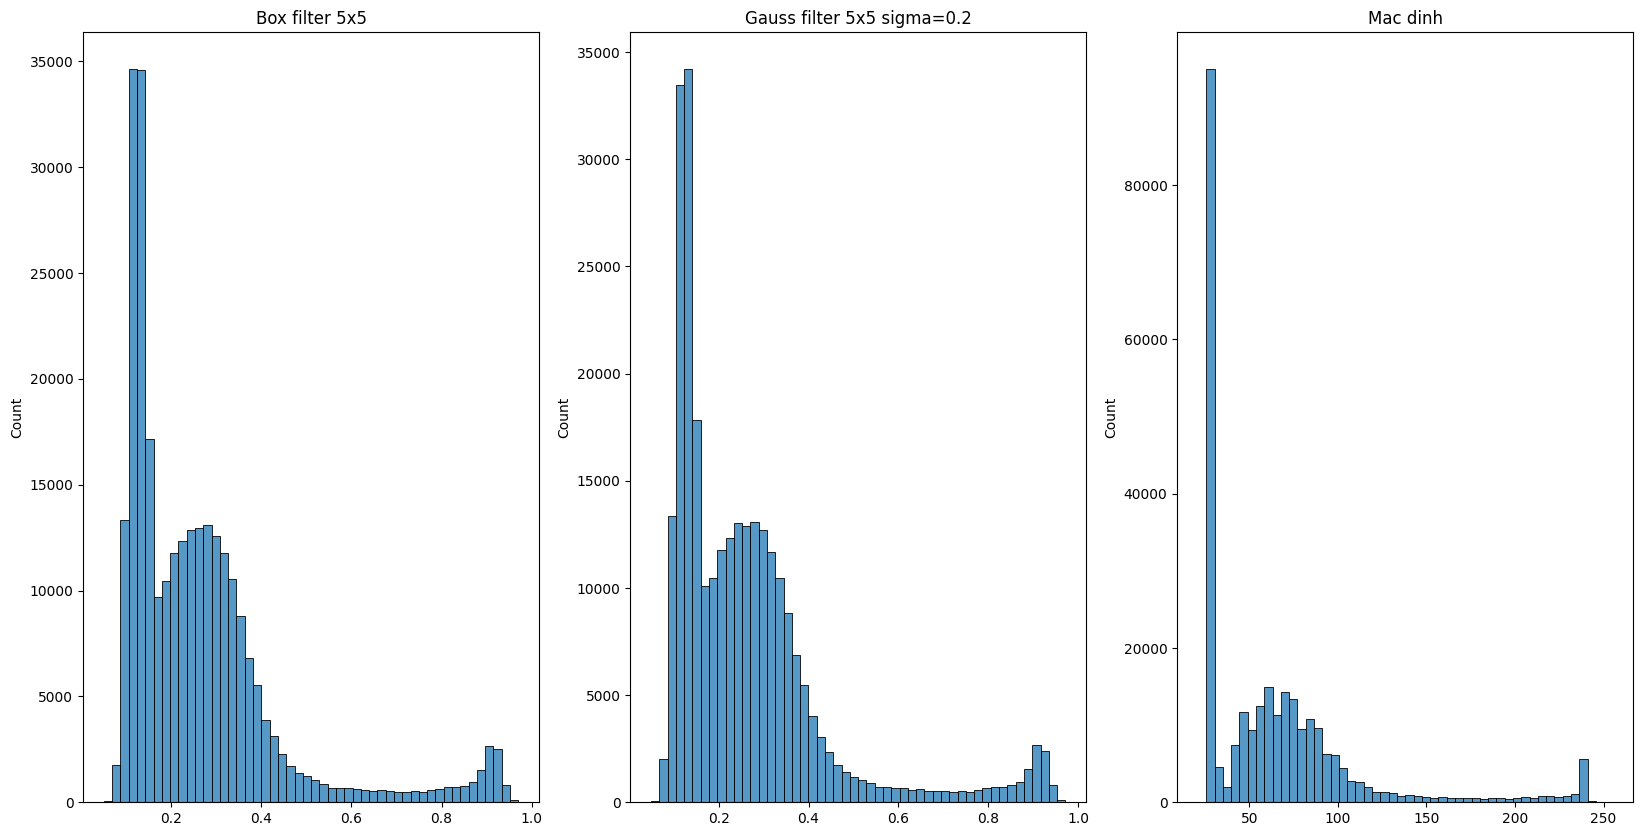

In [ ]:
import seaborn as sns

plt.figure(figsize=(20, 10))

plt.subplot(131)
sns.histplot(img_box5.ravel(), bins=50)
plt.title("Box filter 5x5")

plt.subplot(132)
sns.histplot(img_gaus5.ravel(), bins=50)
plt.title("Gauss filter 5x5 sigma=0.2")

plt.subplot(133)
sns.histplot(xray.ravel(), bins=50)
plt.title("Mac dinh")

Khi dua ve filter thi phan phoi so dem histogram ca 2 phuong phap muot hon

Phuong phap box filter lam cho so dem vung gan 0 lon hon phuong phap gauss

Khi nhin ky thi phuong phap gauss lam anh it bi nhoe hon box filter